# Import necessary libraries

In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Open the data

To define different clusters around samples, we will use the scaled data.

In [2]:
file_path = '/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/scaled_data.csv'
df = pd.read_csv(file_path, index_col = 0)
df.head(5)

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,...,4c87674d-dd05-490d-a584-84490509f4d4.rna_seq.augmented_star_gene_counts.tsv,5cfb768f-7b49-4a72-92c9-d7502f5ba5b8.rna_seq.augmented_star_gene_counts.tsv,03ef99c7-55b7-4770-9eac-2ee007aa78ca.rna_seq.augmented_star_gene_counts.tsv,3ab1dfbc-ab83-446e-b680-cd6aec12b177.rna_seq.augmented_star_gene_counts.tsv,029a2c3e-0fd1-4cb4-9021-3947d28ca28d.rna_seq.augmented_star_gene_counts.tsv,ed41fe8b-fe2e-4bf3-91e3-2cf50ddcbc78.rna_seq.augmented_star_gene_counts.tsv,b9a5766c-e155-423e-a075-10fb14fe87df.rna_seq.augmented_star_gene_counts.tsv,a462c0f9-23d3-428b-9b61-e42cb6a68af1.rna_seq.augmented_star_gene_counts.tsv,0d3cfbc0-4420-48ed-a459-2e18d2ece5b6.rna_seq.augmented_star_gene_counts.tsv,d43517e2-e447-42cc-93e1-cbc9669ef4f1.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000001626.16,-0.667981,0.375156,0.655839,0.108740,0.868734,-0.641129,0.428405,-0.870485,-0.528776,0.634491,...,-0.306701,-0.814577,-0.675406,-0.390213,0.520473,-0.686942,0.341151,0.315405,0.234808,-0.715043
ENSG00000002587.10,0.614897,0.570903,0.915728,0.023776,-0.190241,0.346002,0.483255,0.954841,0.966359,0.413219,...,0.526251,-0.210895,-0.348430,0.185681,0.189952,0.393044,0.896640,0.749310,0.288469,0.085603
ENSG00000002726.21,1.970417,2.099478,-0.710378,0.882967,0.097773,-0.373023,-0.325831,1.862487,1.628818,-0.475599,...,-0.445021,-0.567760,-0.479725,-0.767549,0.019907,-0.423261,-0.455486,-0.681016,0.775937,-0.459610
ENSG00000003249.15,1.422344,0.856106,0.489451,1.188984,0.443431,1.686741,1.510567,1.182376,1.059196,-0.317317,...,0.307732,0.398737,0.370919,0.555645,0.321994,0.247836,0.126748,0.469801,0.549783,0.288388
ENSG00000003989.18,0.603052,0.451167,0.932766,-0.370804,1.169632,-0.337921,1.986231,1.092944,0.672852,0.736763,...,-0.156062,0.336920,0.719432,0.202713,0.369987,0.194420,0.390353,-0.134390,0.660113,-0.378071


# Clustering

Before clustering with K-means method, we will perform a PCA. To quantify clustering goodnes with different K values, we will use three different metrics.

- When using Calinsky - Harabasz analysis to evaluate K-means clustering performance, as more high the score is the better clusters are defined in the model. The given index/score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters.

- The Davies-Bouldin index can also be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters, being 0 the lowest possible score. This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Number of Clusters: 2
Calinski-Harabasz Index: 2228.890
Davies-Bouldin Index: 0.841


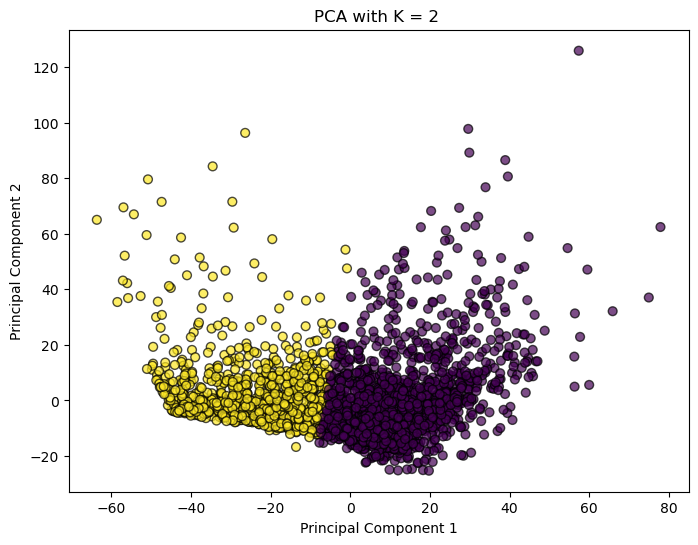

Number of Clusters: 3
Calinski-Harabasz Index: 2400.449
Davies-Bouldin Index: 0.794


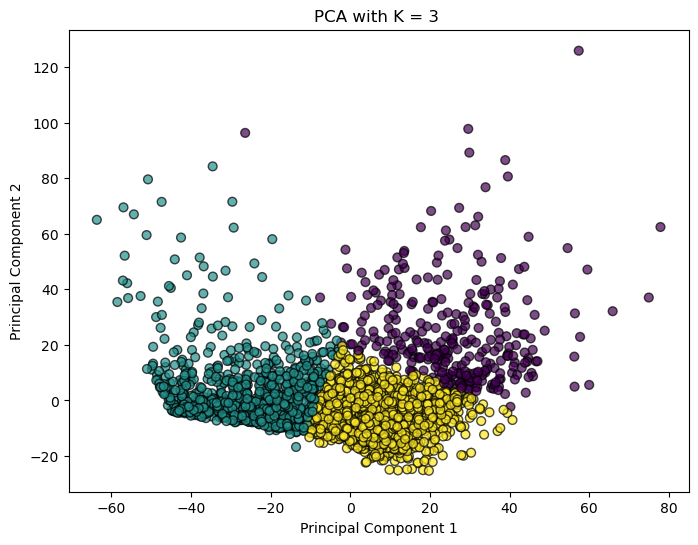

Number of Clusters: 4
Calinski-Harabasz Index: 2239.842
Davies-Bouldin Index: 0.863


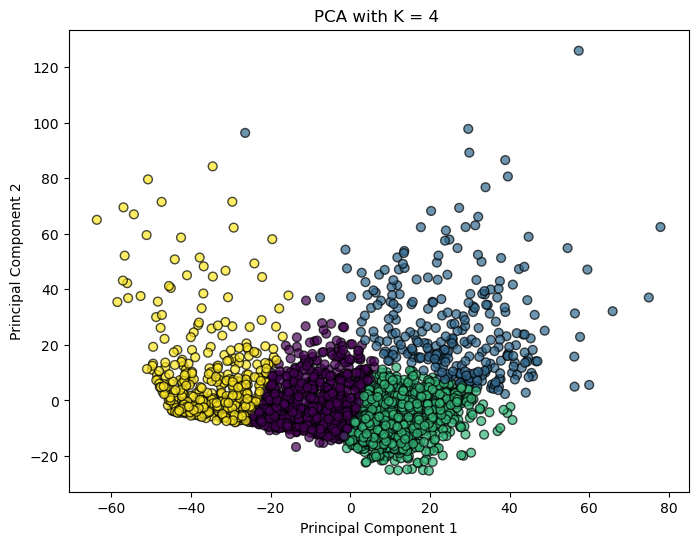

Number of Clusters: 5
Calinski-Harabasz Index: 2188.651
Davies-Bouldin Index: 0.873


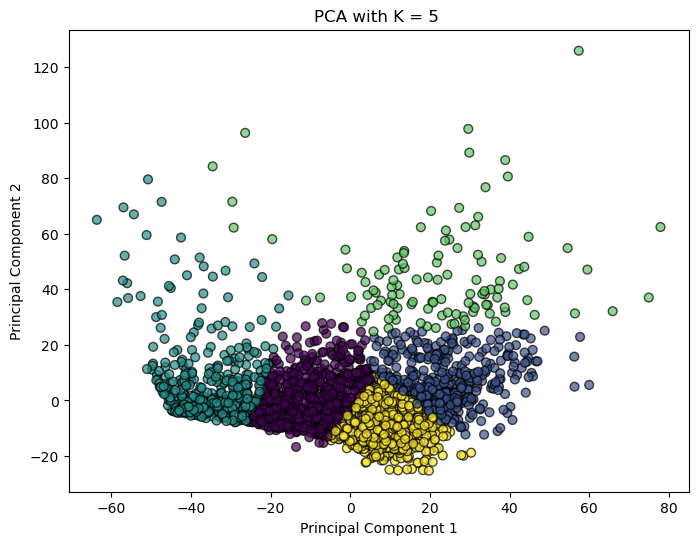

Number of Clusters: 6
Calinski-Harabasz Index: 2260.220
Davies-Bouldin Index: 0.804


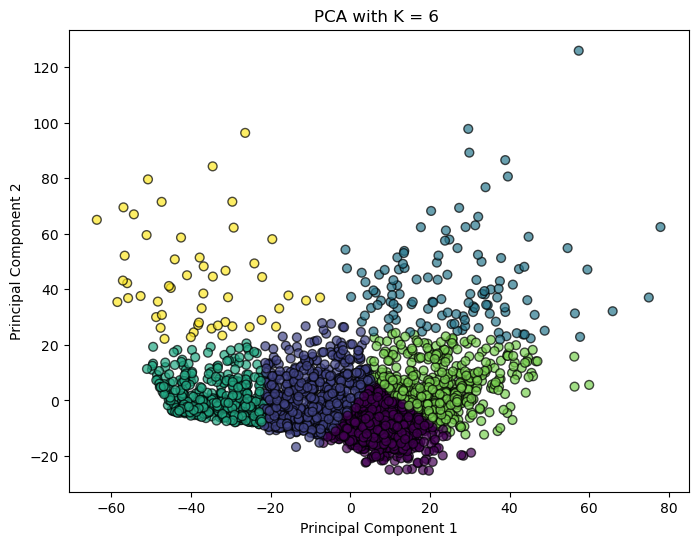

Number of Clusters: 8
Calinski-Harabasz Index: 2311.465
Davies-Bouldin Index: 0.827


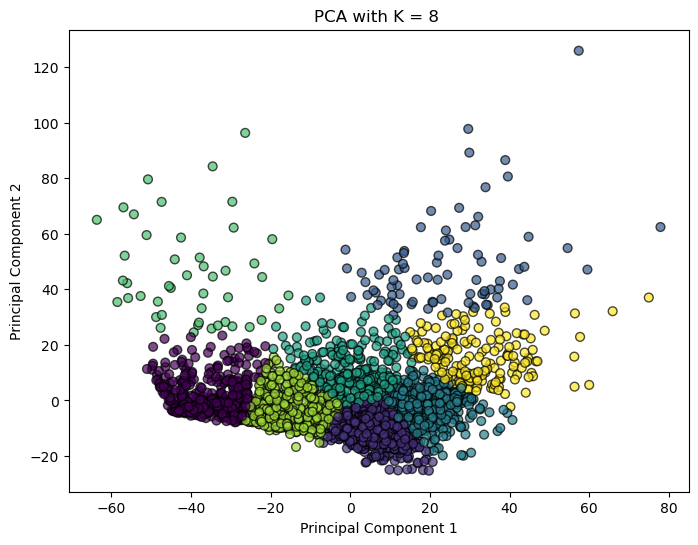

In [3]:
n_cluster = [2, 3, 4, 5, 6, 8]

for clusters in n_cluster:
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df)
    
    
    kmeans = KMeans(n_clusters=clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_result)
    
    print(f"Number of Clusters: {clusters}")
    print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(pca_result, cluster_labels):.3f}")
    print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(pca_result, cluster_labels):.3f}")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=40, alpha=.7)
    plt.title(f'PCA with K = {clusters} ')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

The last index we are doing to evaluate K-means clustering performance is the Silhouette Coefficient, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering, and scores around zero indicate overlapping clusters.

The Silhouette Coefficient is defined for each sample and is composed of two scores: a: The mean distance between a sample and all other points in the same class. b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient 's' for a single sample is given as: s = (b-a)/max(a, b)

Number of Clusters: 2, Silhouette Score: 0.23


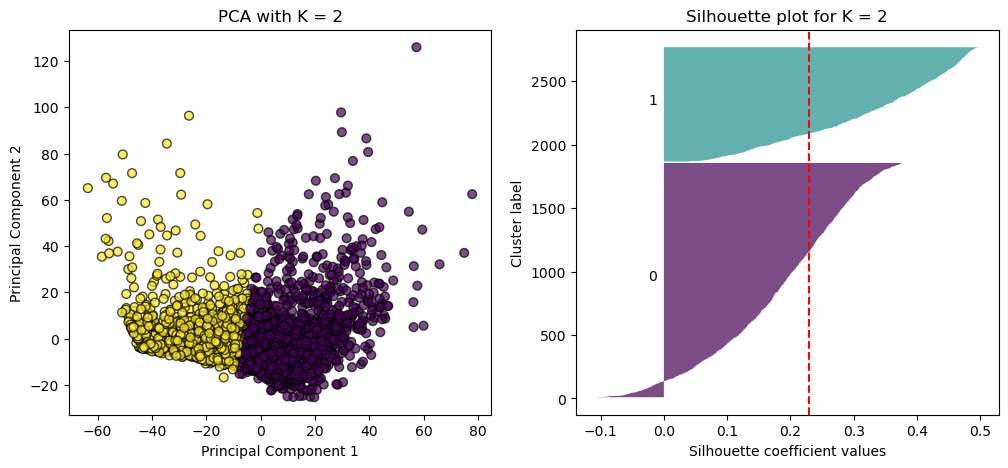

Number of Clusters: 3, Silhouette Score: 0.24


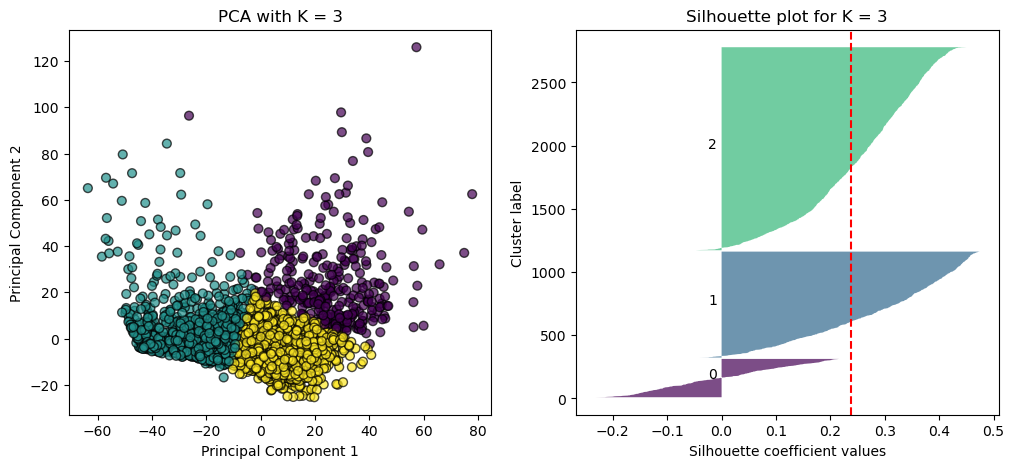

Number of Clusters: 4, Silhouette Score: 0.14


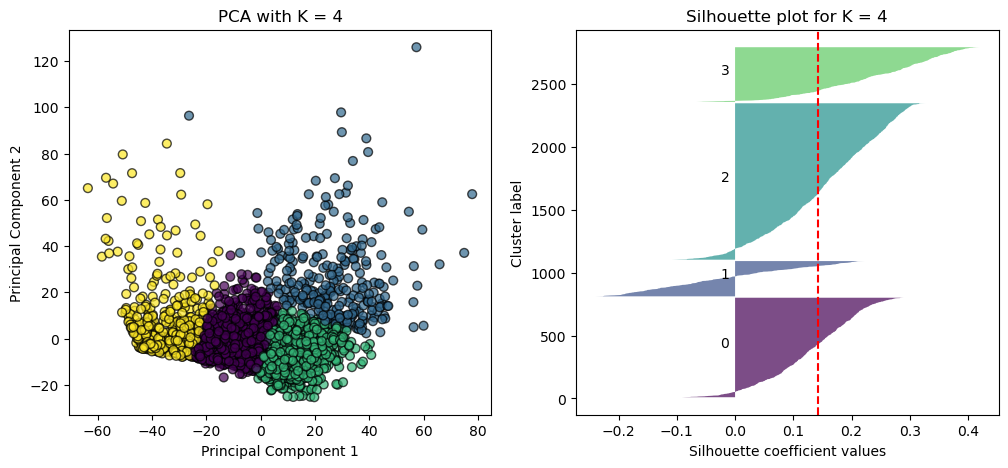

Number of Clusters: 5, Silhouette Score: 0.13


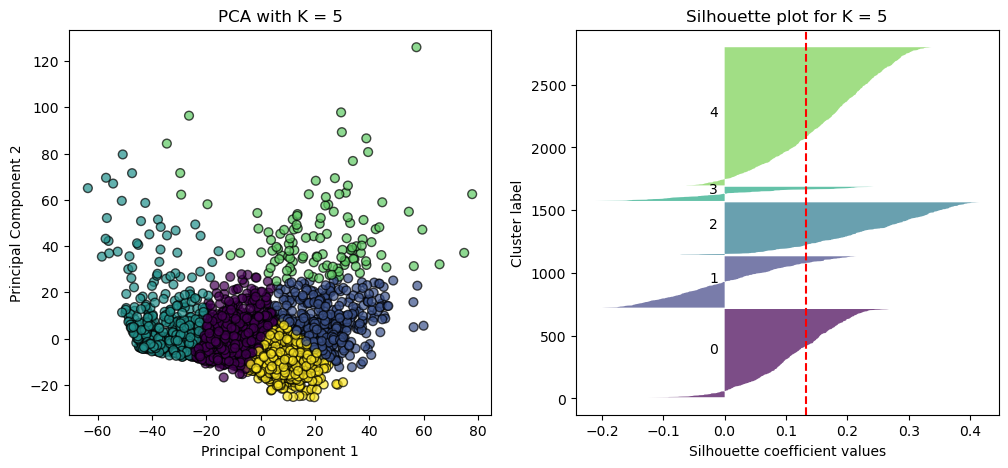

Number of Clusters: 6, Silhouette Score: 0.13


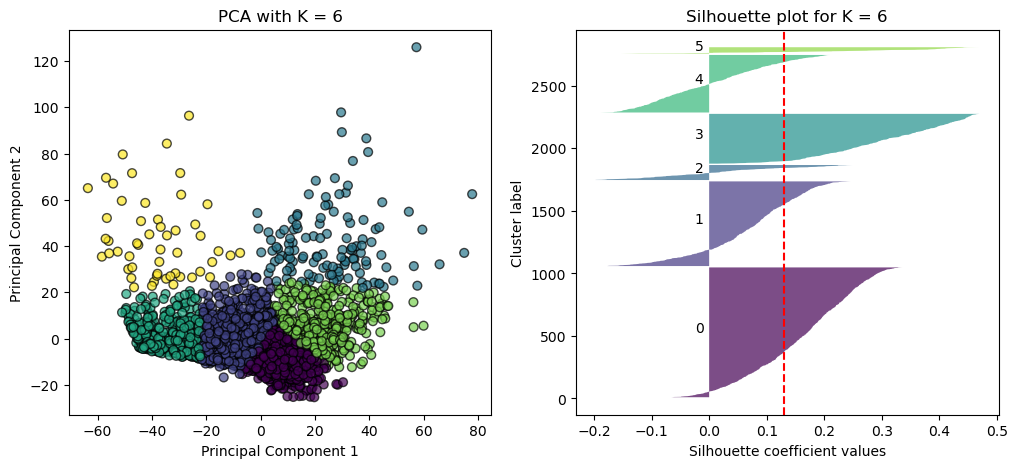

Number of Clusters: 8, Silhouette Score: 0.10


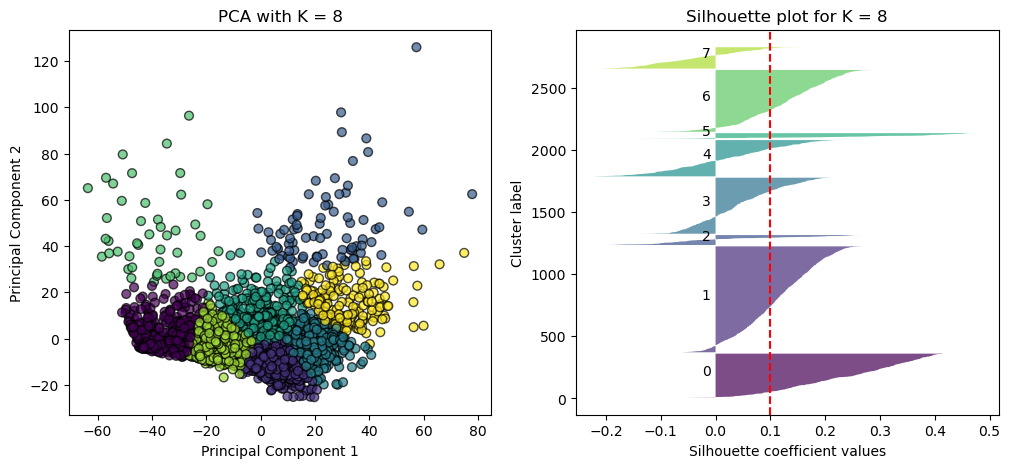

In [4]:
n_clusters = [2, 3, 4, 5, 6, 8]

for clusters in n_clusters:
   
    kmeans = KMeans(n_clusters = clusters, random_state = 42, n_init = 10)
    cluster_labels = kmeans.fit_predict(pca_result)
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f'Number of Clusters: {clusters}, Silhouette Score: {silhouette_avg:.2f}')

    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = cluster_labels, cmap = 'viridis', edgecolor = 'k', s = 40, alpha = 0.7)
    plt.title(f'PCA with K = {clusters}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.subplot(1, 2, 2)
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    y_lower = 10
    for i in range(clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.viridis(float(i) / clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, alpha=0.7)
        plt.text(-0.025, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.axvline(x = silhouette_avg, color = "red", linestyle = "--")
    plt.title(f'Silhouette plot for K = {clusters}')
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster label')
    plt.show()

Afer testing K - means clustering performance using 3 different methods and obtaining inconsistent results, we can conclude that we need to use another clustering algorithm. Maybe another method of dimensionality reduction different from PCA would also help.